## Importing the Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Collection

In [ ]:
car_ds = pd.read_csv('/content/drive/MyDrive/Big Data/Car details v3 (2).csv')

### Data Cleaning starts from here

In [ ]:
car_ds.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
car_ds.shape

(8128, 13)

In [ ]:
car_ds.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [ ]:
car_ds = car_ds.dropna()

In [ ]:
car_ds.shape

(7906, 13)

In [ ]:
car_ds.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


In [ ]:
car_ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 864.7+ KB


In [ ]:
# checking the distribution of categorical data
print(car_ds.name.value_counts())
print(car_ds.fuel.value_counts())
print(car_ds.seller_type.value_counts())
print(car_ds.transmission.value_counts())
print(car_ds.owner.value_counts())
print(car_ds.mileage.value_counts())
print(car_ds.engine.value_counts())
print(car_ds.max_power.value_counts())
print(car_ds.torque.value_counts())

name
Maruti Swift Dzire VDI                     129
Maruti Alto 800 LXI                         82
Maruti Alto LXi                             71
BMW X4 M Sport X xDrive20d                  62
Maruti Swift VDI                            61
                                          ... 
Honda Amaze VX i-VTEC                        1
Maruti Eeco 5 STR With AC Plus HTR CNG       1
Mercedes-Benz E-Class E250 CDI Elegance      1
Maruti Swift LDI SP Limited Edition          1
Maruti Wagon R VXI AMT Opt 1.2               1
Name: count, Length: 1982, dtype: int64
fuel
Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: count, dtype: int64
seller_type
Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: count, dtype: int64
transmission
Manual       6865
Automatic    1041
Name: count, dtype: int64
owner
First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: co

## Data Pre-Processing

In [ ]:
car_ds['brand'] = car_ds['name'].str.split().str[0]
car_ds = car_ds.drop(columns=['name'])

In [ ]:
car_ds['mileage'] = car_ds['mileage'].str.replace(' kmpl', '')
car_ds['mileage'] = car_ds['mileage'].str.replace(' km/kg', '')
car_ds['mileage'] = car_ds['mileage'].astype(float)

In [ ]:
car_ds['engine'] = car_ds['engine'].str.replace(' CC', '')
car_ds['engine'] = car_ds['engine'].astype(int)

In [ ]:
car_ds['max_power'] = car_ds['max_power'].str.replace(' bhp', '')
car_ds['max_power'] = car_ds['max_power'].astype(float)

In [ ]:
car_ds['torque'] = car_ds['torque'].str.extract('(\d+)', expand=False)
car_ds['torque'] = car_ds['torque'].astype(float)

In [ ]:
label_encoder = LabelEncoder()

car_ds['brand'] = label_encoder.fit_transform(car_ds['brand'])
car_ds['fuel'] = label_encoder.fit_transform(car_ds['fuel'])
car_ds['seller_type'] = label_encoder.fit_transform(car_ds['seller_type'])
car_ds['transmission'] = label_encoder.fit_transform(car_ds['transmission'])
car_ds['owner'] = label_encoder.fit_transform(car_ds['owner'])

In [ ]:
car_ds.dtypes

,0
year,int64
selling_price,int64
km_driven,int64
fuel,int64
seller_type,int64
transmission,int64
owner,int64
mileage,float64
engine,int64
max_power,float64


In [ ]:
car_ds.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand
0,2014,450000,145500,1,1,1,0,23.40,1248,74.00,190.0,5.0,20
1,2014,370000,120000,1,1,1,2,21.14,1498,103.52,250.0,5.0,26
2,2006,158000,140000,3,1,1,4,17.70,1497,78.00,12.0,5.0,10
3,2010,225000,127000,1,1,1,0,23.00,1396,90.00,22.0,5.0,11
4,2007,130000,120000,3,1,1,0,16.10,1298,88.20,11.0,5.0,20


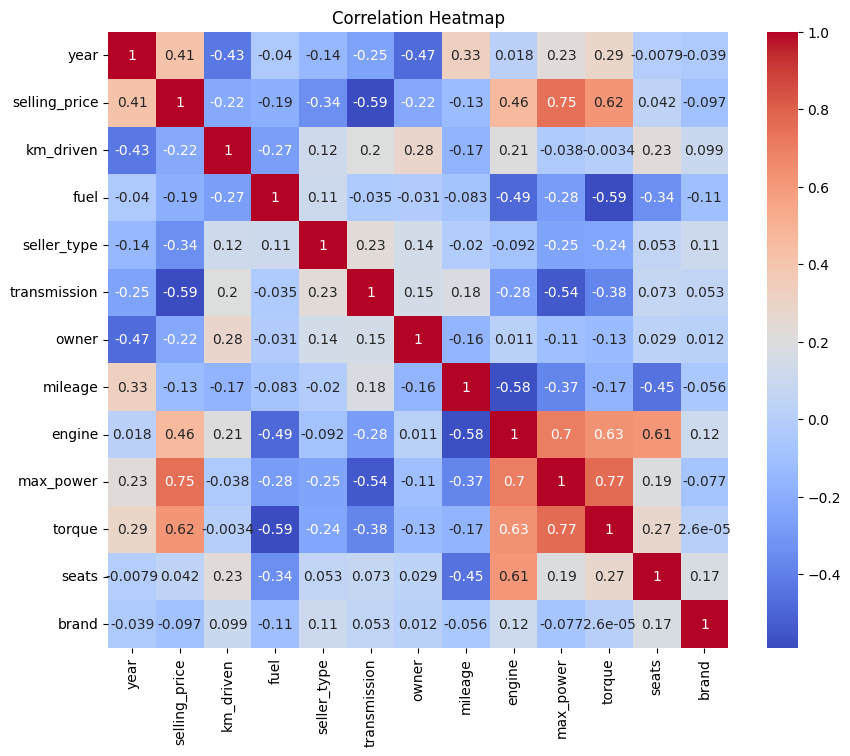

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(car_ds.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Splitting the data and Target

In [ ]:
X = car_ds.drop(['selling_price'],axis=1)
Y = car_ds['selling_price']

In [ ]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner  mileage  \
0     2014     145500     1            1             1      0    23.40   
1     2014     120000     1            1             1      2    21.14   
2     2006     140000     3            1             1      4    17.70   
3     2010     127000     1            1             1      0    23.00   
4     2007     120000     3            1             1      0    16.10   
...    ...        ...   ...          ...           ...    ...      ...   
8123  2013     110000     3            1             1      0    18.50   
8124  2007     119000     1            1             1      1    16.80   
8125  2009     120000     1            1             1      0    19.30   
8126  2013      25000     1            1             1      0    23.57   
8127  2013      25000     1            1             1      0    23.57   

      engine  max_power  torque  seats  brand  
0       1248      74.00   190.0    5.0     20  
1       1498   

In [ ]:
print(Y)

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 7906, dtype: int64


## Splitting Training and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

## Model Training

### 1. Random Forest Regressor

In [ ]:
random_forest_model = RandomForestRegressor()

In [ ]:
random_forest_model.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
# prediction on Training data
random_train_data_prediction = random_forest_model.predict(X_train)

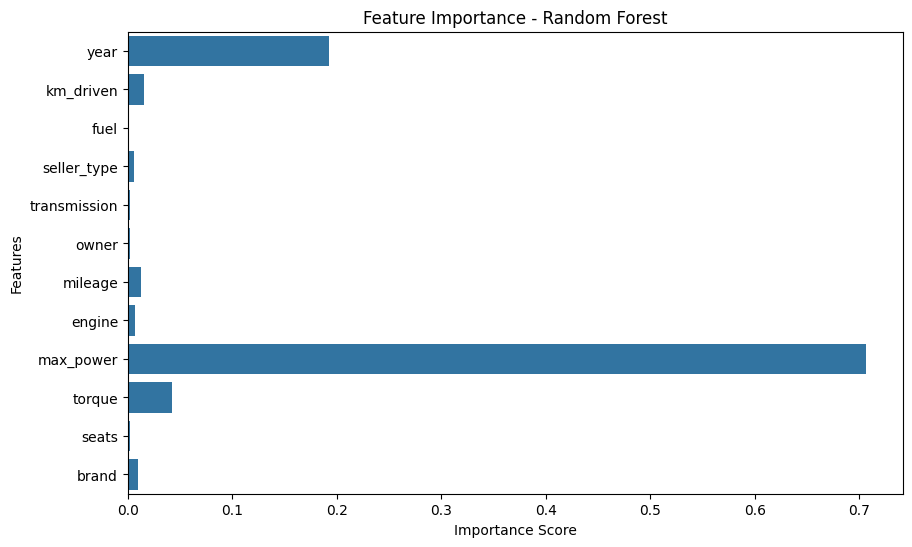

In [ ]:
importances = random_forest_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [ ]:
random_test_data_prediction = random_forest_model.predict(X_test)


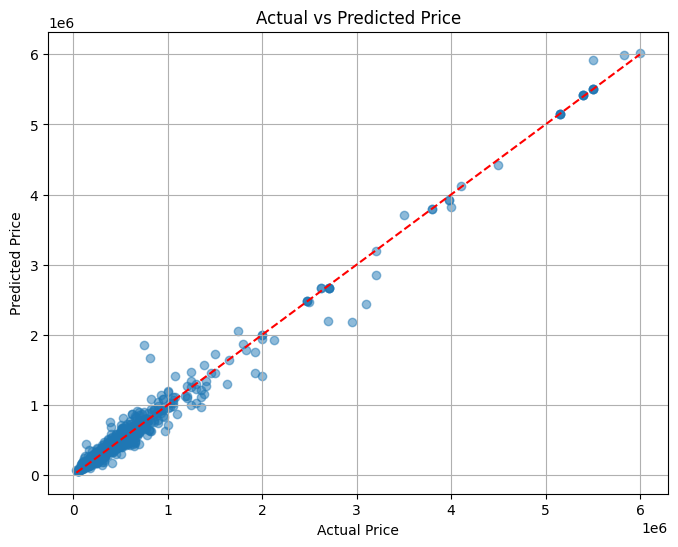

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, random_test_data_prediction, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Train the model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, Y_train)

# Step 2: Predict on Training and Test Sets
train_predictions = random_forest_model.predict(X_train)
test_predictions = random_forest_model.predict(X_test)

# Step 3: Evaluation on Training Set
r2_train = r2_score(Y_train, train_predictions)
mae_train = mean_absolute_error(Y_train, train_predictions)
mse_train = mean_squared_error(Y_train, train_predictions)
rmse_train = np.sqrt(mse_train)

print("🔵 Training Set Metrics:")
print(f"R² Score: {r2_train:.4f}")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}\n")

# Step 4: Evaluation on Test Set
r2_test = r2_score(Y_test, test_predictions)
mae_test = mean_absolute_error(Y_test, test_predictions)
mse_test = mean_squared_error(Y_test, test_predictions)
rmse_test = np.sqrt(mse_test)

print("🟠 Test Set Metrics:")
print(f"R² Score: {r2_test:.4f}")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")


🔵 Training Set Metrics:
R² Score: 0.9960
MAE: 25525.30
MSE: 2627584123.02
RMSE: 51259.97

🟠 Test Set Metrics:
R² Score: 0.9846
MAE: 60258.27
MSE: 11694776008.93
RMSE: 108142.39


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# MSE (Mean Squared Error) for training data
mse_train_rf = mean_squared_error(Y_train, random_train_data_prediction)
print("MSE (Train - Random Forest):", mse_train_rf)

# RMSE (Root Mean Squared Error) for training data
rmse_train_rf = np.sqrt(mse_train_rf)
print("RMSE (Train - Random Forest):", rmse_train_rf)


MSE (Train - Random Forest): 2754551270.441953
RMSE (Train - Random Forest): 52483.819129727526


In [ ]:
# prediction on Test data
random_test_data_prediction = random_forest_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# R squared Error (Train)
r2_train = r2_score(Y_train, random_train_data_prediction)
print("R squared (Train):", r2_train)

# RMSE and MAE (Train)
rmse_train = np.sqrt(mean_squared_error(Y_train, random_train_data_prediction))
mae_train = mean_absolute_error(Y_train, random_train_data_prediction)
print("RMSE (Train):", rmse_train)
print("MAE (Train):", mae_train)


R squared (Train): 0.9957701852886828
RMSE (Train): 52483.819129727526
MAE (Train): 25666.6228054766


### 2. XGBoost Regressor Model

In [ ]:
xgb_model = XGBRegressor()

In [ ]:
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# prediction on Training data
xgb_train_data_prediction = xgb_model.predict(X_train)

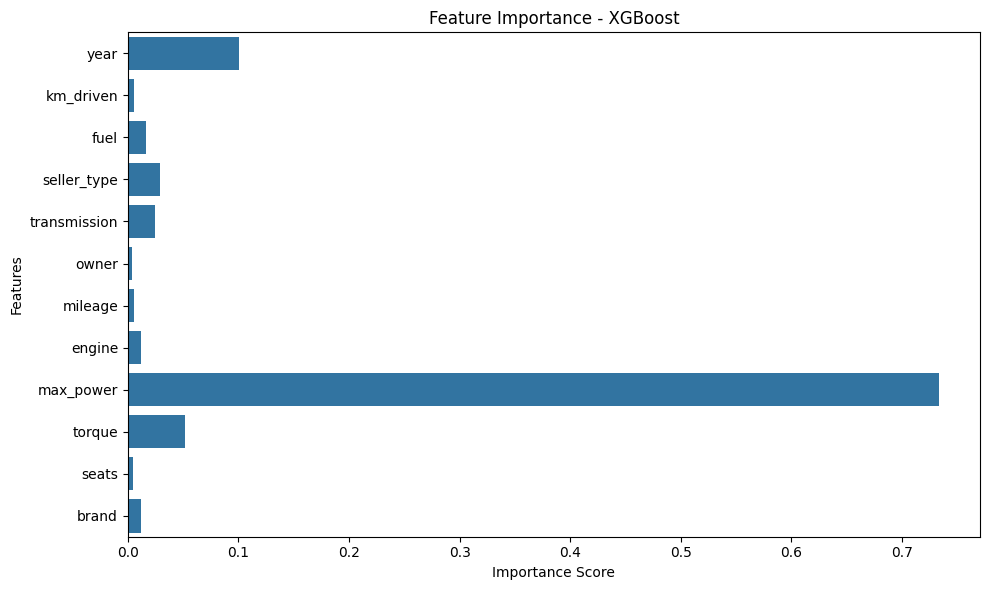

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

xgb_importance = xgb_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_importance, y=features)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, Y_train)

# Generate predictions
xgb_predictions = xgb_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


rmse = np.sqrt(mean_squared_error(Y_test, xgb_predictions))
mae = mean_absolute_error(Y_test, xgb_predictions)
r2 = r2_score(Y_test, xgb_predictions)

print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost MAE: {mae:.2f}")
print(f"XGBoost R² Score: {r2:.4f}")


XGBoost RMSE: 99760.99
XGBoost MAE: 58762.22
XGBoost R² Score: 0.9869


In [ ]:
# R squared Error
r2_train = metrics.r2_score(Y_train, xgb_train_data_prediction)
print("R squared Error : ", r2_train)

R squared Error :  0.995825469493866


In [ ]:
# prediction on Test data
xgb_test_data_prediction = xgb_model.predict(X_test)

In [ ]:
# R squared Error
r2_test = metrics.r2_score(Y_test, xgb_test_data_prediction)
print("R squared Error : ", r2_test)

R squared Error :  0.9868575930595398


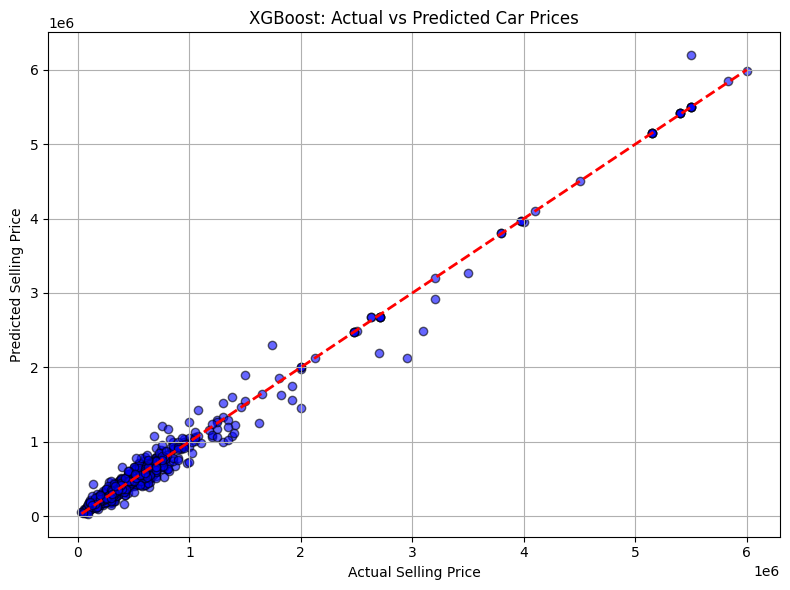

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, xgb_test_data_prediction, color='blue', alpha=0.6, edgecolors='k')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)  # Ideal line

plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('XGBoost: Actual vs Predicted Car Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

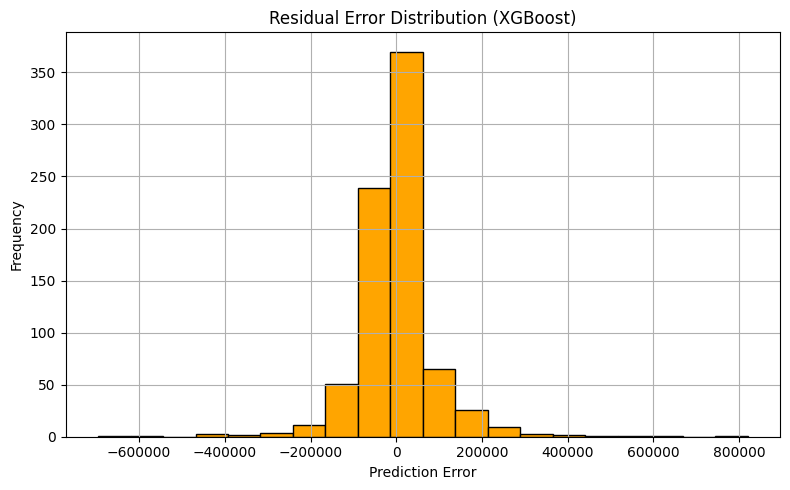

In [ ]:
errors = Y_test - xgb_test_data_prediction

plt.figure(figsize=(8, 5))
plt.hist(errors, bins=20, color='orange', edgecolor='black')
plt.title("Residual Error Distribution (XGBoost)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()